In [124]:
import pandas as pd
path="student-mat.csv"
data=pd.read_csv(path,delimiter=';')

In [125]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [126]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [127]:
data.shape

(395, 33)

In [128]:
import numpy as np
x=np.array(data.iloc[:,:-1])
y=np.array(data.iloc[:,-1])

Based on all other factors, we predict the student's grade 3 (G3).

We must encode all the non-numeric values into numeric values in order to perform mathematical predictions.

In [129]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [130]:
for col in non_numeric_columns:
    print(f'{col}-->{set(data[col])}')

school-->{'GP', 'MS'}
sex-->{'F', 'M'}
address-->{'U', 'R'}
famsize-->{'GT3', 'LE3'}
Pstatus-->{'A', 'T'}
Mjob-->{'services', 'at_home', 'health', 'teacher', 'other'}
Fjob-->{'services', 'at_home', 'health', 'teacher', 'other'}
reason-->{'reputation', 'course', 'home', 'other'}
guardian-->{'father', 'mother', 'other'}
schoolsup-->{'no', 'yes'}
famsup-->{'no', 'yes'}
paid-->{'no', 'yes'}
activities-->{'no', 'yes'}
nursery-->{'no', 'yes'}
higher-->{'no', 'yes'}
internet-->{'no', 'yes'}
romantic-->{'no', 'yes'}


-------------------------------------------------------------------------------<br>
encoding:<br>
yes=1, no=0<br>
M=1 , F=0<br>
MS=0 ,GP=1<br>
R=1, U=0 <br>
LE3=3 , GT3=4 <br>
A=1 , T=0 <br>
at_home= 1, teacher= 2,other=0 , health=3 ,services=4 <br>
course=1 , other=0 , home=3 , reputation=3 <br>
father= 1, other=0 , mother= 0<br>
-------------------------------------------------------------------------------<br>

In [131]:
dataCopy=data.copy()
dataCopy.replace(['yes', 'no'], [1, 0], inplace=True) #BINARY ENCODING
dataCopy.replace(['M', 'F'], [1, 0], inplace=True) #BINARY ENCODING
one_hot_encoded = pd.get_dummies(dataCopy['school'], prefix='school') #one hot encoding
dataCopy = pd.concat([one_hot_encoded, dataCopy.drop('school', axis=1)], axis=1)
dataCopy.replace(['R', 'U'], [1, 0], inplace=True) #BINARY ENCODING
dataCopy.replace(['LE3', 'GT3'], [3, 4], inplace=True) #LABEL ENCODING
dataCopy.replace(['A', 'T'], [1, 0], inplace=True) #BINARY ENCODING
dataCopy.replace(['at_home', 'teacher', 'other','health','services'], [1,2,0,3,4], inplace=True) #custom encoding
dataCopy.replace(['course','home','reputation'], [1,2,3], inplace=True)#custom encoding
dataCopy.replace(['father', 'mother'], [1, 0], inplace=True) #custom encoding

In [132]:
dataCopy

,school_GP,school_MS,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,18,0,4,1,4,4,1,...,4,3,4,1,1,3,6,5,6,6
1,1,0,0,17,0,4,0,1,1,1,...,5,3,3,1,1,3,4,5,5,6
2,1,0,0,15,0,3,0,1,1,1,...,4,3,2,2,3,3,10,7,8,10
3,1,0,0,15,0,4,0,4,2,3,...,3,2,2,1,1,5,2,15,14,15
4,1,0,0,16,0,4,0,3,3,0,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,1,20,0,3,1,2,2,4,...,5,5,4,4,5,4,11,9,9,9
391,0,1,1,17,0,3,0,3,1,4,...,2,4,5,3,4,2,3,14,16,16
392,0,1,1,21,1,4,0,1,1,0,...,5,5,3,3,3,3,3,10,8,7
393,0,1,1,18,1,3,0,3,2,4,...,4,4,1,3,4,5,0,11,12,10


FINDING CORRELATIONS OF EACH COLUMN WITH G3 TO DROP COLUMNS WITH WEAK CORRELATION

In [133]:
correlation_matrix = dataCopy.corr()['G3']
correlation_matrix

school_GP     0.045017
school_MS    -0.045017
sex           0.103456
age          -0.161579
address      -0.105756
famsize      -0.081407
Pstatus       0.058009
Medu          0.217147
Fedu          0.152457
Mjob          0.144675
Fjob          0.030317
reason        0.062688
guardian      0.032493
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
schoolsup    -0.082788
famsup       -0.039157
paid          0.101996
activities    0.016100
nursery       0.051568
higher        0.182465
internet      0.098483
romantic     -0.129970
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [134]:
cnt=0
for col,value in correlation_matrix.items():
    if abs(value)<0.08:
        cnt+=1
        print(f'{col} has a weak correlation with G3 ({value})')
        dataCopy.drop(col,axis=1,inplace=True)
print(cnt)

school_GP has a weak correlation with G3 (0.04501694311330662)
school_MS has a weak correlation with G3 (-0.0450169431133066)
Pstatus has a weak correlation with G3 (0.05800898495931118)
Fjob has a weak correlation with G3 (0.03031683289918259)
reason has a weak correlation with G3 (0.06268800074399833)
guardian has a weak correlation with G3 (0.032493220399946676)
famsup has a weak correlation with G3 (-0.039157145237904846)
activities has a weak correlation with G3 (0.016099701295814218)
nursery has a weak correlation with G3 (0.051567900910917605)
famrel has a weak correlation with G3 (0.0513634288812822)
freetime has a weak correlation with G3 (0.011307240308312975)
Dalc has a weak correlation with G3 (-0.0546600405667359)
Walc has a weak correlation with G3 (-0.05193932374224616)
health has a weak correlation with G3 (-0.06133460487712118)
absences has a weak correlation with G3 (0.03424731615006925)
15


In [135]:
random_row=dataCopy.sample(n=1).iloc[0, :-1]
random_index = random_row.name
random_row = np.array(random_row).reshape(1,-1)
print(random_index)

139


## ANALYZING FACTORS AFFECTING STUDENT'S PERFORMANCE 

In [136]:
max=-999
for col,value in correlation_matrix.items():
    # print(col)
    if value>max and value!=1 and col!='G2' and col!='G1':
        max=value
        feature=col
print(feature,max)


Medu 0.21714749613860562


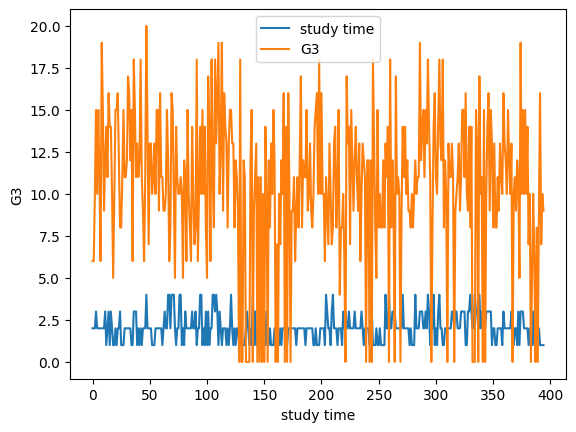

In [137]:
import matplotlib.pyplot as plt
plt.plot(dataCopy['studytime'],label='study time')
plt.plot(dataCopy['G3'],label='G3')
plt.xlabel('study time')
plt.ylabel('G3')
plt.legend()
plt.show()

 ## MULTIPLE LINEAR REGRESSION

In [138]:
MLRCopy=dataCopy.copy()
MLRCopy

,sex,age,address,famsize,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,G1,G2,G3
0,0,18,0,4,4,4,1,2,2,0,1,0,1,0,0,4,5,6,6
1,0,17,0,4,1,1,1,1,2,0,0,0,1,1,0,3,5,5,6
2,0,15,0,3,1,1,1,1,2,3,1,1,1,1,0,2,7,8,10
3,0,15,0,4,4,2,3,1,3,0,0,1,1,1,1,2,15,14,15
4,0,16,0,4,3,3,0,1,2,0,0,1,1,0,0,2,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,0,3,2,2,4,1,2,2,0,1,1,0,0,4,9,9,9
391,1,17,0,3,3,1,4,2,1,0,0,0,1,1,0,5,14,16,16
392,1,21,1,4,1,1,0,1,1,3,0,0,1,0,0,3,10,8,7
393,1,18,1,3,3,2,4,3,1,0,0,0,1,1,0,1,11,12,10


In [139]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x=np.array(MLRCopy.iloc[:,:-1])
y=np.array(MLRCopy.iloc[:,-1])
model=LinearRegression()
model.fit(x,y)
intercept=model.intercept_
coeffs=model.coef_
y_pred_mlr=model.predict(x)
mse=mean_squared_error(y,y_pred_mlr)
rmse= pow(mse,0.5)
print(f'RMSE = {rmse}')

RMSE = 1.8895074534734702


In [140]:
prediction=model.predict(random_row)
print(f"prediction for randomly selected row: {prediction[0]}")
actualValue=MLRCopy.iloc[random_index,-1]
print(f"actual value for randomly selected row: {actualValue}")

prediction for randomly selected row: 16.607238619503782
actual value for randomly selected row: 15


TypeError: 'float' object is not callable

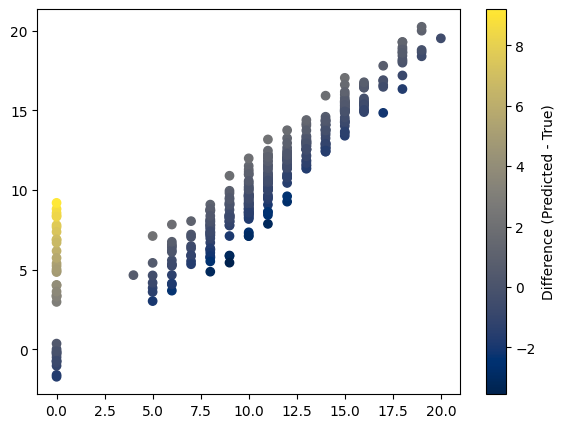

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
difference = y_pred_mlr - MLRCopy['G3']
plt.scatter(MLRCopy['G3'], y_pred_mlr, c=difference, cmap='cividis', marker='o')
plt.colorbar(label='Difference (Predicted - True)')
plt.plot([min(MLRCopy['G3']), max(MLRCopy['G3'])], [min(MLRCopy['G3']), max(MLRCopy['G3'])], linestyle='--', color='red', label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values with Colormap')
plt.grid(True)

plt.subplot(1,2,1)
indices = np.arange(len(y_pred_mlr))
plt.scatter(MLRCopy['G3'],indices,label='actual g3',marker='o',c='g',s=25)
plt.scatter(y_pred_mlr,indices,label='predicted g3',marker='.',c='r')
plt.xlabel('values of G3 and predicted G3')
plt.title('True vs Predicted Values in Multiple Linear Regression')
plt.legend()

plt.tight_layout()
plt.show()

The color of each point is determined by the difference between predicted and true values.
Points with similar true and predicted values will have similar colors.
Each color on the color bar corresponds to a specific difference value.
The color intensity shows the magnitude of the difference: darker colors represent larger differences.

## POLYNOMIAL REGRESSION

In [ ]:
PolyCopy=dataCopy.copy()
PolyCopy

,sex,age,address,famsize,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,paid,higher,internet,romantic,goout,G1,G2,G3
0,0,18,0,4,4,4,1,2,2,0,1,0,1,0,0,4,5,6,6
1,0,17,0,4,1,1,1,1,2,0,0,0,1,1,0,3,5,5,6
2,0,15,0,3,1,1,1,1,2,3,1,1,1,1,0,2,7,8,10
3,0,15,0,4,4,2,3,1,3,0,0,1,1,1,1,2,15,14,15
4,0,16,0,4,3,3,0,1,2,0,0,1,1,0,0,2,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,0,3,2,2,4,1,2,2,0,1,1,0,0,4,9,9,9
391,1,17,0,3,3,1,4,2,1,0,0,0,1,1,0,5,14,16,16
392,1,21,1,4,1,1,0,1,1,3,0,0,1,0,0,3,10,8,7
393,1,18,1,3,3,2,4,3,1,0,0,0,1,1,0,1,11,12,10


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
def multipolyRegression(degree,X,Y,flag,ipf=None):
    x=np.array(X)
    y=np.array(Y)
    polyFeatures=PolynomialFeatures(degree)
    x_poly=polyFeatures.fit_transform(x)
    model=LinearRegression()
    model.fit(x_poly,y)
    y_pred=model.predict(x_poly)
    rmse=pow(mean_squared_error(y,y_pred),0.5)
    if flag==0:
        print(f"RMSE for {degree} degree:{rmse}")
        return y_pred
    elif flag==1:
        ipf_poly=polyFeatures.fit_transform(ipf)
        pred=model.predict(ipf_poly)
        print(f"prediction for {degree} degree:{pred[0]}")


In [ ]:
x=PolyCopy.iloc[:,:-1]
y=PolyCopy.iloc[:,-1]
degree2=multipolyRegression(2,x,y,0)
degree3=multipolyRegression(3,x,y,0)
degree4=multipolyRegression(4,x,y,0)

RMSE for 2 degree:1.295911432156298
RMSE for 3 degree:2.311849317612015e-13
RMSE for 4 degree:3.864185668074331e-13


In [ ]:
actualValue=PolyCopy.iloc[random_index,-1]
print(f"actual value for randomly selected row: {actualValue}")
multipolyRegression(2,x,y,1,random_row)
multipolyRegression(3,x,y,1,random_row)
multipolyRegression(4,x,y,1,random_row)

actual value for randomly selected row: 9
prediction for 2 degree:10.42008594903156
prediction for 3 degree:9.00000000000015
prediction for 4 degree:9.000000000000417


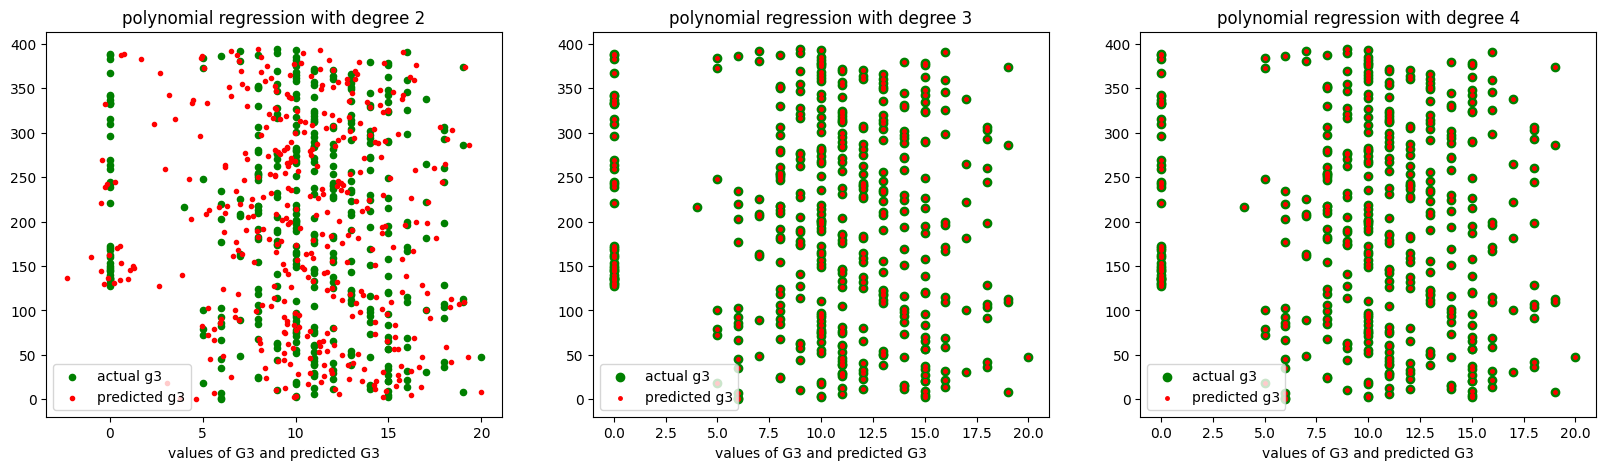

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
indices = np.arange(len(degree2))
plt.scatter(PolyCopy['G3'],indices,label='actual g3',marker='o',c='g',s=20)
plt.scatter(degree2,indices,label='predicted g3',marker='.',c='r')
plt.xlabel('values of G3 and predicted G3')
plt.title('polynomial regression with degree 2')
plt.legend()

plt.subplot(1,3,2)
indices = np.arange(len(degree2))
plt.scatter(PolyCopy['G3'],indices,label='actual g3',marker='o',c='g')
plt.scatter(degree3,indices,label='predicted g3',marker='.',c='r',s=25)
plt.xlabel('values of G3 and predicted G3')
plt.title('polynomial regression with degree 3')
plt.legend()

plt.subplot(1,3,3)
indices = np.arange(len(degree2))
plt.scatter(PolyCopy['G3'],indices,label='actual g3',marker='o',c='g')
plt.scatter(degree4,indices,label='predicted g3',marker='.',c='r',s=25)
plt.xlabel('values of G3 and predicted G3')
plt.title('polynomial regression with degree 4')
plt.legend()

## LOGISTIC REGRESSION